<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/Project%20Kelompok%209%20Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lung Cancer Prediction**

*Kelompok 9:*


*   Muhammad Arsya Zain Yashifa - TIF 22
*   Jennifer Leonardi - SI 23

## **Theme, Dataset, and Business Understanding**






### **1. Background**

Lung cancer is a disease characterized by the growth of abnormal cells in the lungs. These abnormal cells can develop into tumors that can interfere with lung function and spread to other parts of the body.

The impacts of Lung Cancer: High mortality rate, lung cancer can progress rapidly and often does not show symptoms in the early stages. Lung cancer can cause various symptoms that interfere with the patient's quality of life, and also requires high costs, including surgery, chemotherapy, and radiation.

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. According to Globocan data 2020, there were 32,788 new cases and 28,815 deaths from lung cancer in Indonesia

### **2. Objectives**



1.   Identification of factors leading to Lung Cancer
2.   Creating a model to predict Lung Cancer based on conditions
1.   Predicting the likelihood of a patient developing lung cancer
2.   Determining the most effective treatment for a patient with lung cancer




### **3. Dataset**

Title: Cancer Patients Dataset

Source: Kaggle

Link: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

### **4. Dataset Attributes**

* **Age**: The age of the patient. (Numeric)
* **Gender**: The gender of the patient. (Categorical)
* **Air Pollution**: The level of air pollution exposure of the patient. (Categorical)
* **Alcohol use**: The level of alcohol use of the patient. (Categorical)
* **Dust Allergy**: The level of dust allergy of the patient. (Categorical)
* **OccuPational Hazards**: The level of occupational hazards of the patient. (Categorical)
* **Genetic Risk**: The level of genetic risk of the patient. (Categorical)
* **chronic Lung Disease**: The level of chronic lung disease of the patient. (Categorical)
* **Balanced Diet**: The level of balanced diet of the patient. (Categorical)
* **Obesity**: The level of obesity of the patient. (Categorical)
* **Smoking**: The level of smoking of the patient. (Categorical)
* **Passive Smoker**: The level of passive smoker of the patient. (Categorical)
* **Chest Pain**: The level of chest pain of the patient. (Categorical)
* **Coughing of Blood**: The level of coughing of blood of the patient. (Categorical)
* **Fatigue**: The level of fatigue of the patient. (Categorical)
* **Weight Loss**: The level of weight loss of the patient. (Categorical)
* **Shortness of Breath**: The level of shortness of breath of the patient. (Categorical)
* **Wheezing**: The level of wheezing of the patient. (Categorical)
* **Swallowing Difficulty**: The level of swallowing difficulty of the patient. (Categorical)
* **Clubbing of Finger Nails**: The level of clubbing of finger nails of the patient. (Categorical)

## **EDA and Analysis**

### **1. Loading Dataset**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import math

In [3]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [4]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


### **2. Data Understanding**

In [6]:
# Mengetahui jumlah baris dan kolom
data.shape

(1000, 26)

In [7]:
# Mengetahui tipe data tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
# Distribusi data
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### **3. Data Visualization and Preprocessing**

In [9]:
# Mengecek data kosong
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
# Mengecek data duplikat
data.duplicated().sum()

0

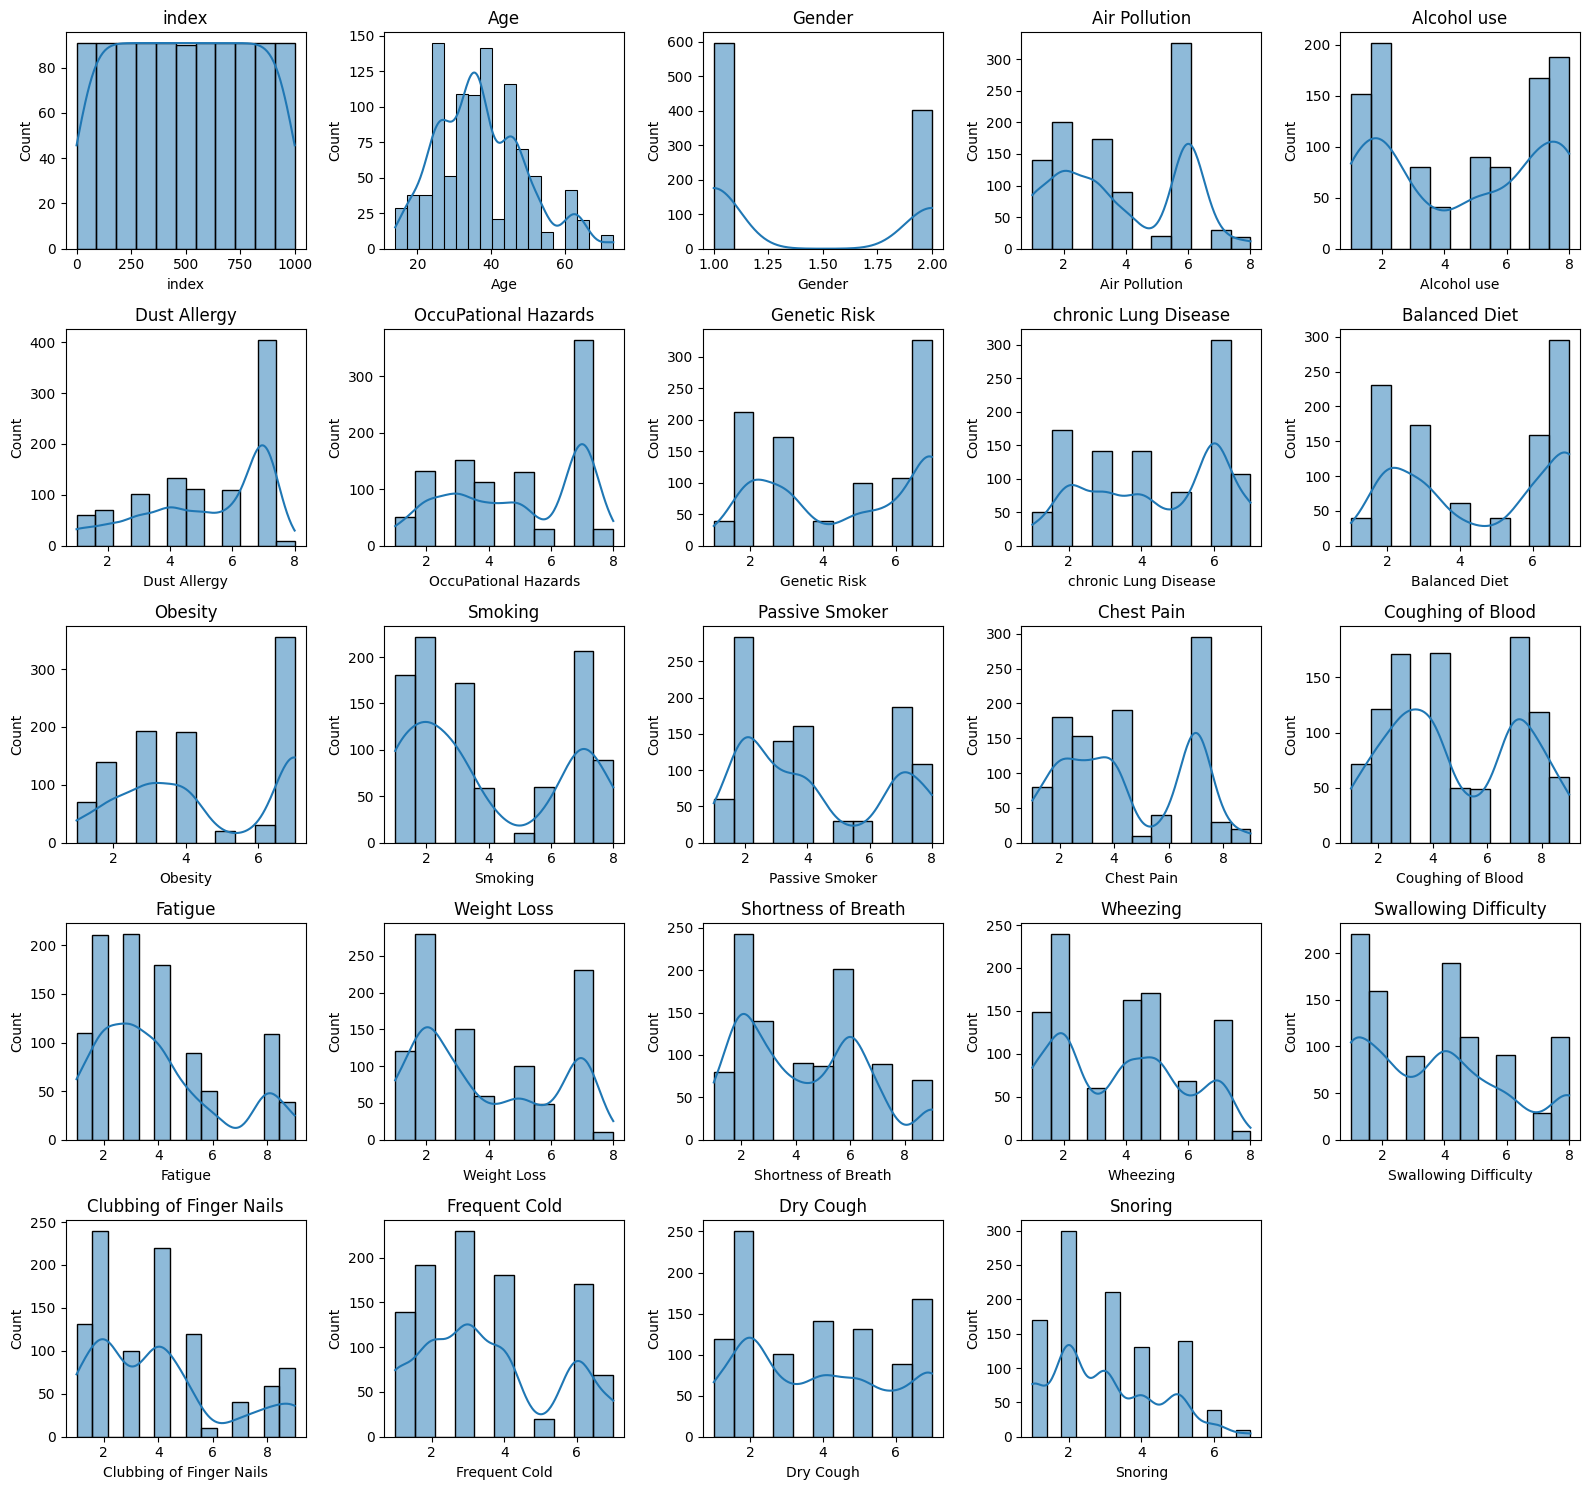

In [11]:
# Melihat distribusi data
data_numeric = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 15))
for i, col in enumerate(data_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data_numeric[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Banyak variabel seperti **Air Pollution, Alcohol use, Dust Allergy, Genetic Risk**, dan lain-lain, menunjukkan distribusi yang cukup bervariasi, dengan beberapa tampak memiliki skewness atau distribusi yang lebih berat pada nilai tertentu.<br><br>
Variabel seperti **Obesity, Coughing of Blood, dan Genetic Risk** menunjukkan sebaran yang lebih luas, menunjukkan variasi yang signifikan dalam respons pasien.<br><br>
Beberapa variabel memiliki distribusi yang cenderung lebih terpusat atau memiliki puncak yang lebih tajam, seperti **Gender dan Level_numeric**, yang mencerminkan karakteristik kategorikal dari data tersebut.

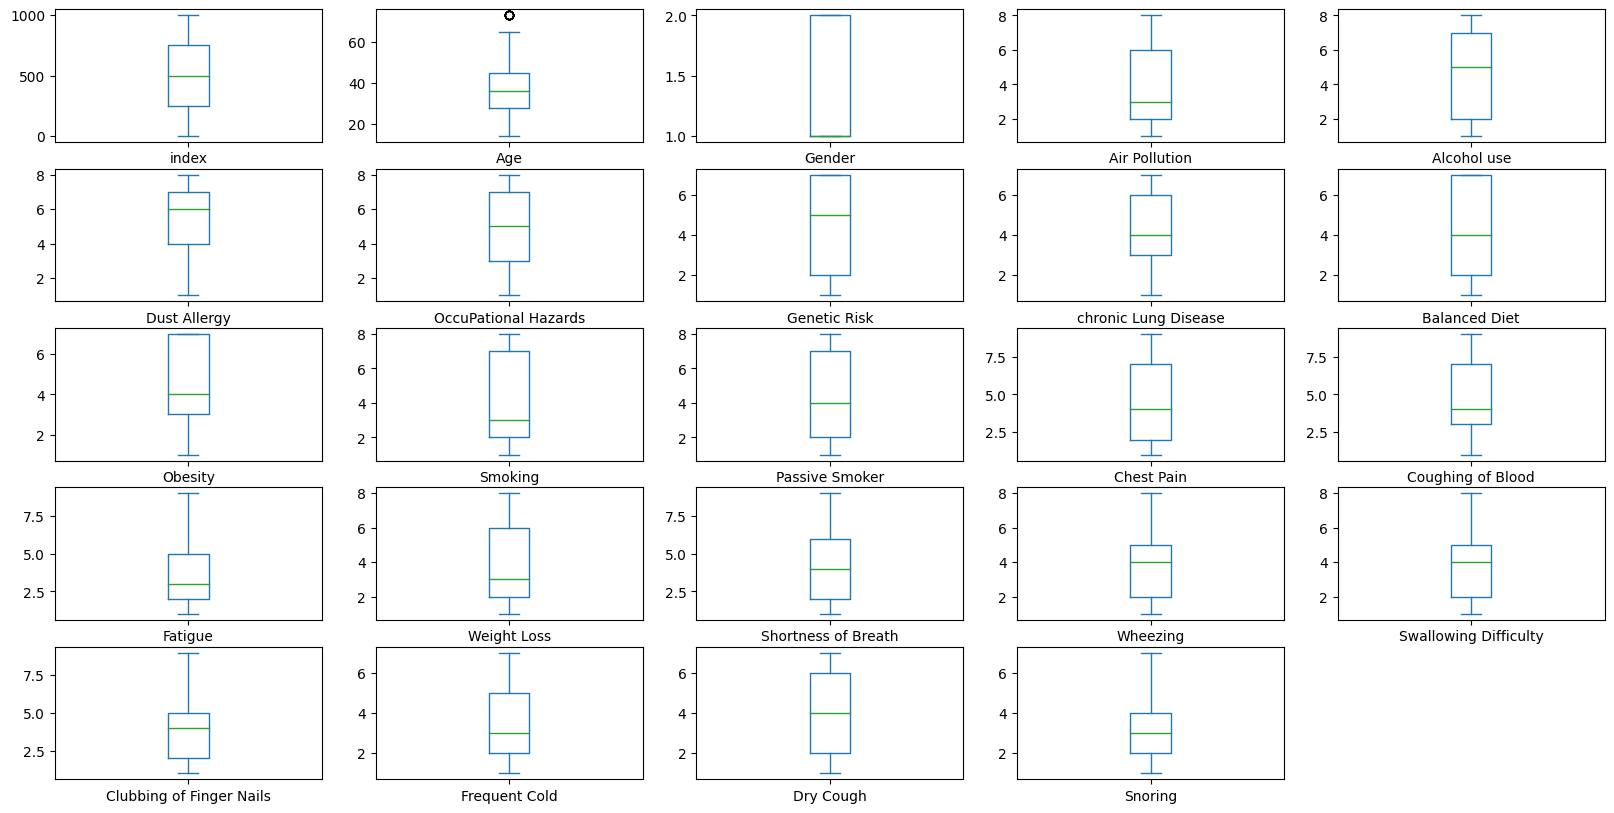

In [12]:
# Mendeteksi outliers menggunakan boxplot IQR
data.plot(kind='box', layout=(5,5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

In [13]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['index', 'Patient Id'], axis=1)

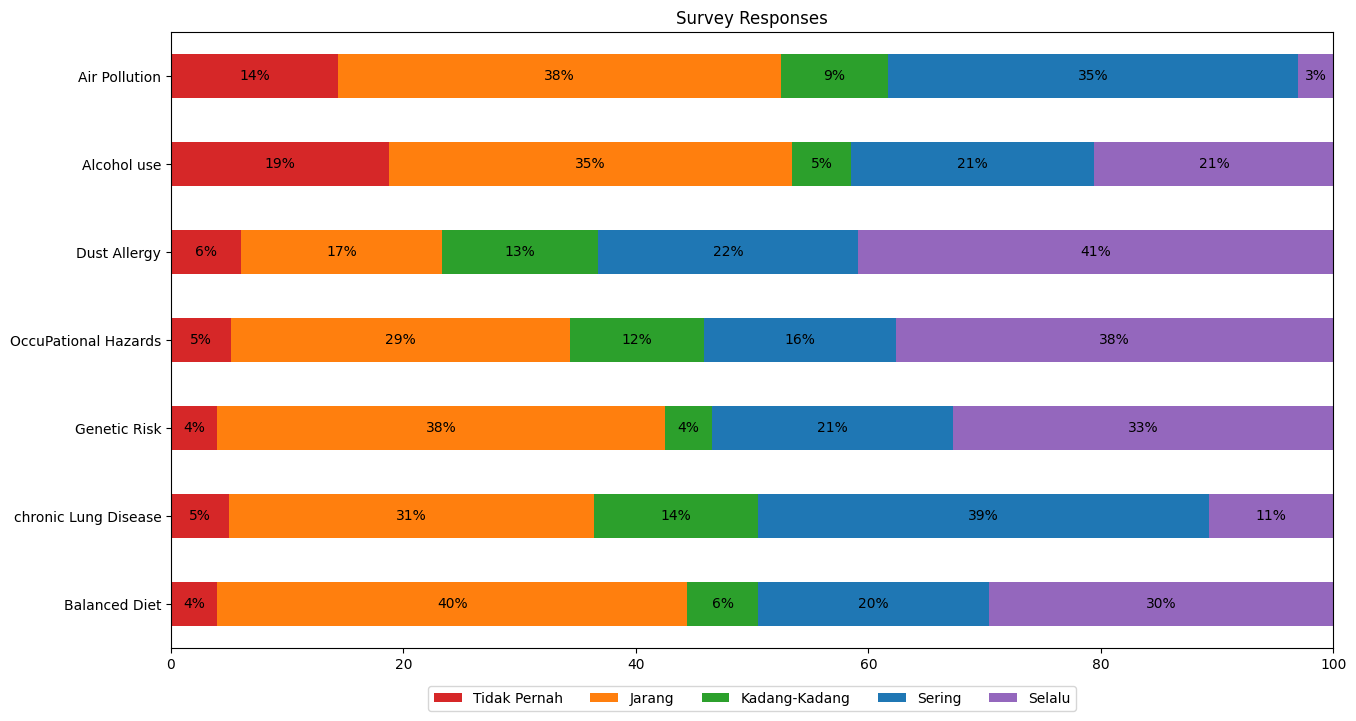

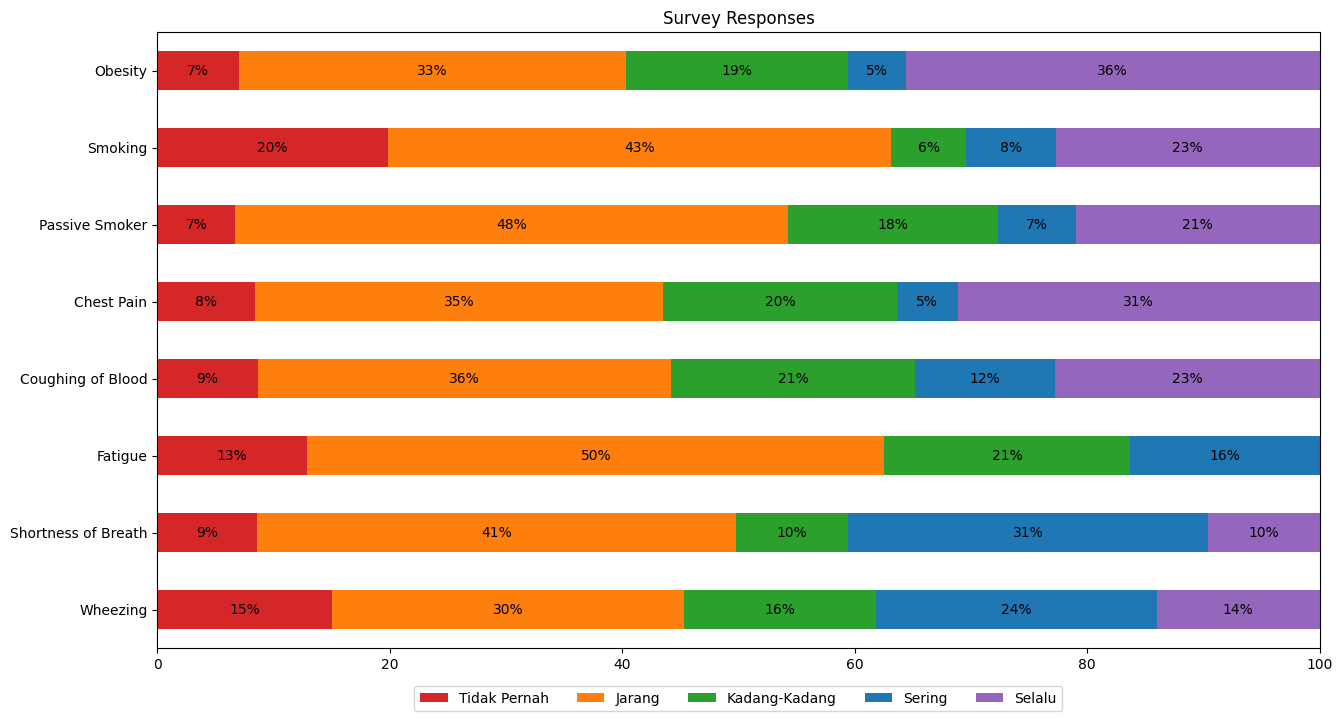

In [14]:
# Likert Chart
scale_mappings = {
    1: 'Tidak Pernah',
    2: 'Jarang', 3: 'Jarang',
    4: 'Kadang-Kadang',
    5: 'Sering', 6: 'Sering',
    7: 'Selalu'
}

columns_drop = ['Age', 'Gender', 'Level', 'Weight Loss', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

columns = [col for col in data.columns if col not in columns_drop]

mid_index = len(columns) // 2
first_half_columns = columns[:mid_index]
second_half_columns = columns[mid_index:]

first_half_data = data[first_half_columns].applymap(lambda x: scale_mappings.get(x, None))
first_half_counts = first_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

second_half_data = data[second_half_columns].applymap(lambda x: scale_mappings.get(x, None))
second_half_counts = second_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

ordered_categories = ['Tidak Pernah', 'Jarang', 'Kadang-Kadang', 'Sering', 'Selalu']
first_half_counts = first_half_counts[ordered_categories]
second_half_counts = second_half_counts[ordered_categories]

def plot_likert_scale(likert_counts):
    fig, ax = plt.subplots(figsize=(15, 8))
    likert_counts.plot(kind='barh', stacked=True,
                       color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd'], ax=ax)
    plt.title('Survey Responses')
    plt.xlim(0, 100)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(likert_counts.columns))

    for n, x in enumerate([*likert_counts.index.values]):
        for (proportion, count, y_loc) in zip(likert_counts.loc[x],
                                              likert_counts.loc[x].cumsum(),
                                              likert_counts.loc[x].cumsum() - likert_counts.loc[x] / 2):
            if proportion > 0:
                ax.text(y_loc, n, f'{proportion:.0f}%', ha='center', va='center')

    ax.invert_yaxis()

    plt.show()

plot_likert_scale(first_half_counts)
plot_likert_scale(second_half_counts)

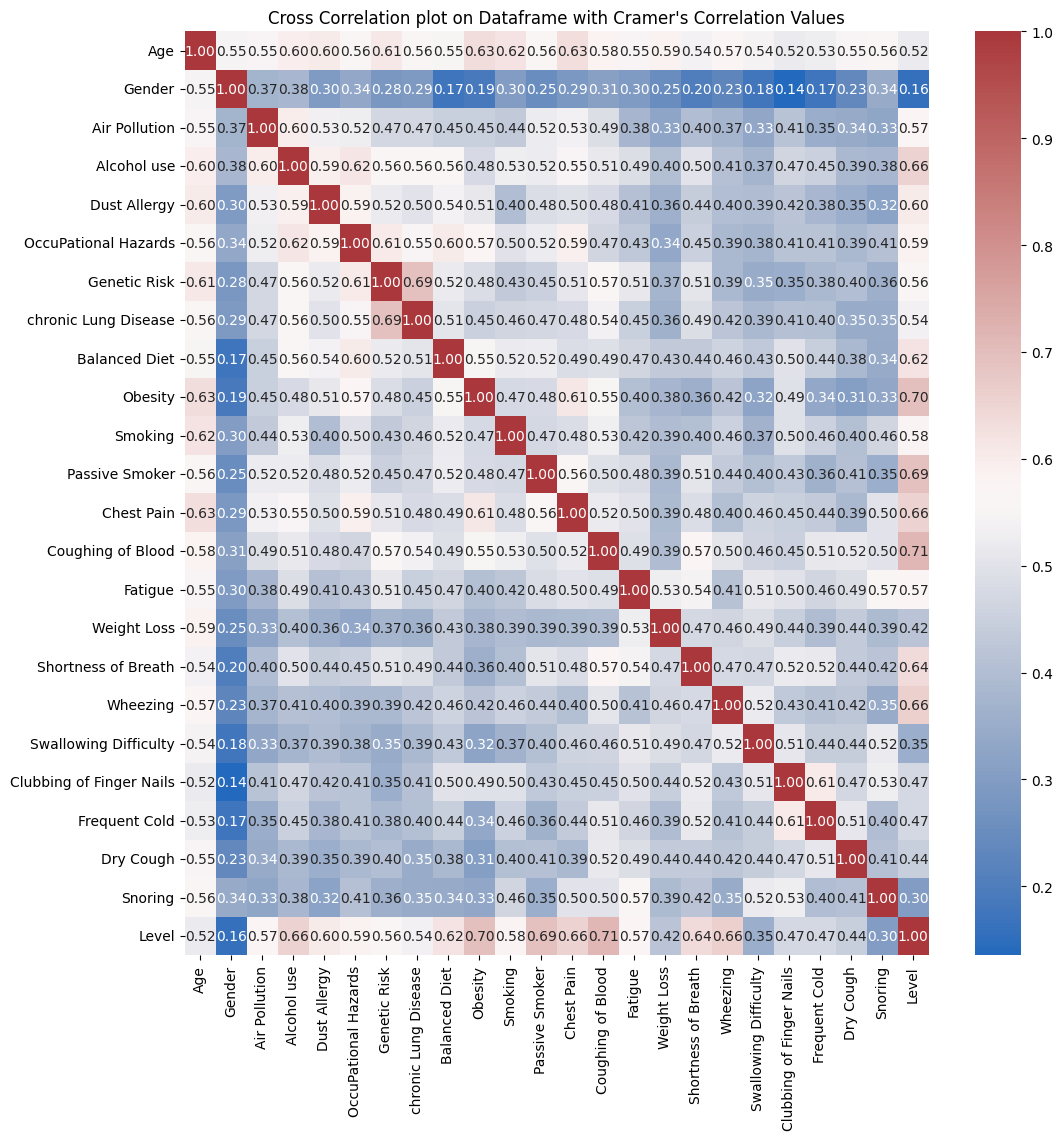

In [15]:
# Melihat korelasi antarfitur dengan metode Cramer
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            v = 0
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    except:
        v = 0
    return v

def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(12,12))
    sns.heatmap(cramer,annot=True,fmt='.2f',cmap="vlag")

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()

plot_cramer(data)

Beberapa fitur menunjukkan korelasi positif yang kuat antara satu sama lain, seperti Air Pollution dengan Dust Allergy, Genetic Risk dengan chronic Lung Disease, dll. Ini menunjukkan bahwa peningkatan dalam satu faktor risiko cenderung dikaitkan dengan peningkatan dalam faktor risiko lain.<br><br>
Fitur seperti Genetic Risk dan chronic Lung Disease memiliki korelasi yang signifikan dengan beberapa faktor risiko lain, menunjukkan pentingnya faktor genetik dan kondisi kesehatan kronis dalam mempengaruhi risiko kesehatan lainnya.

### **4. Analysis and Business Question**

**Univariate**

1. Bagaimana perbandingan jumlah pasien yang menderita kanker dengan resiko rendah, sedang, dan tinggi?

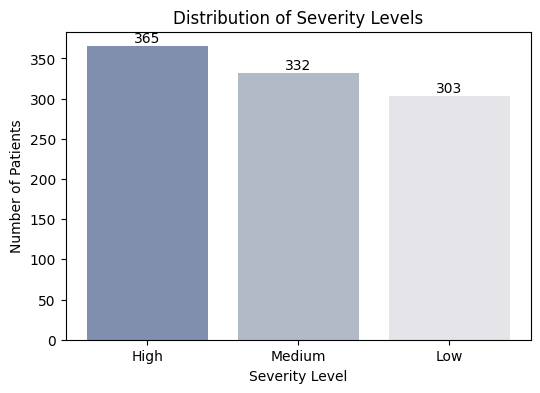

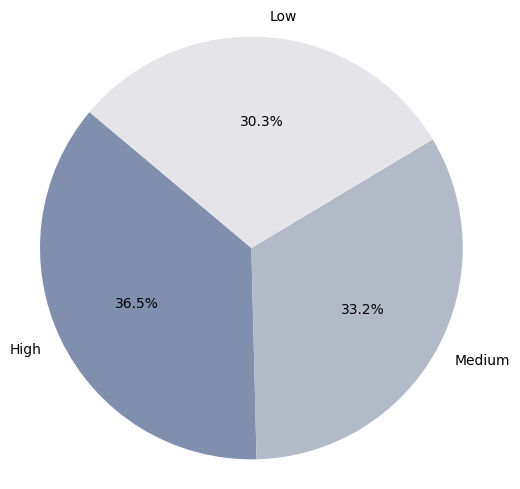

In [16]:
# Histogram
plt.figure(figsize=(6, 4))

level_counts = data['Level'].value_counts()
bars = plt.bar(level_counts.index, level_counts.values, color=['#818FAF', '#B2B9C7', '#E5E5E9'])

plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.show()

# Pie chart
labels = data['Level'].value_counts().index
sizes = data["Level"].value_counts().values
colors = ['#818FAF', '#B2B9C7', '#E5E5E9']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

2. Bagaimana distribusi nilai dari setiap kolom?

<ipython-input-17-5491691e990e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, whi

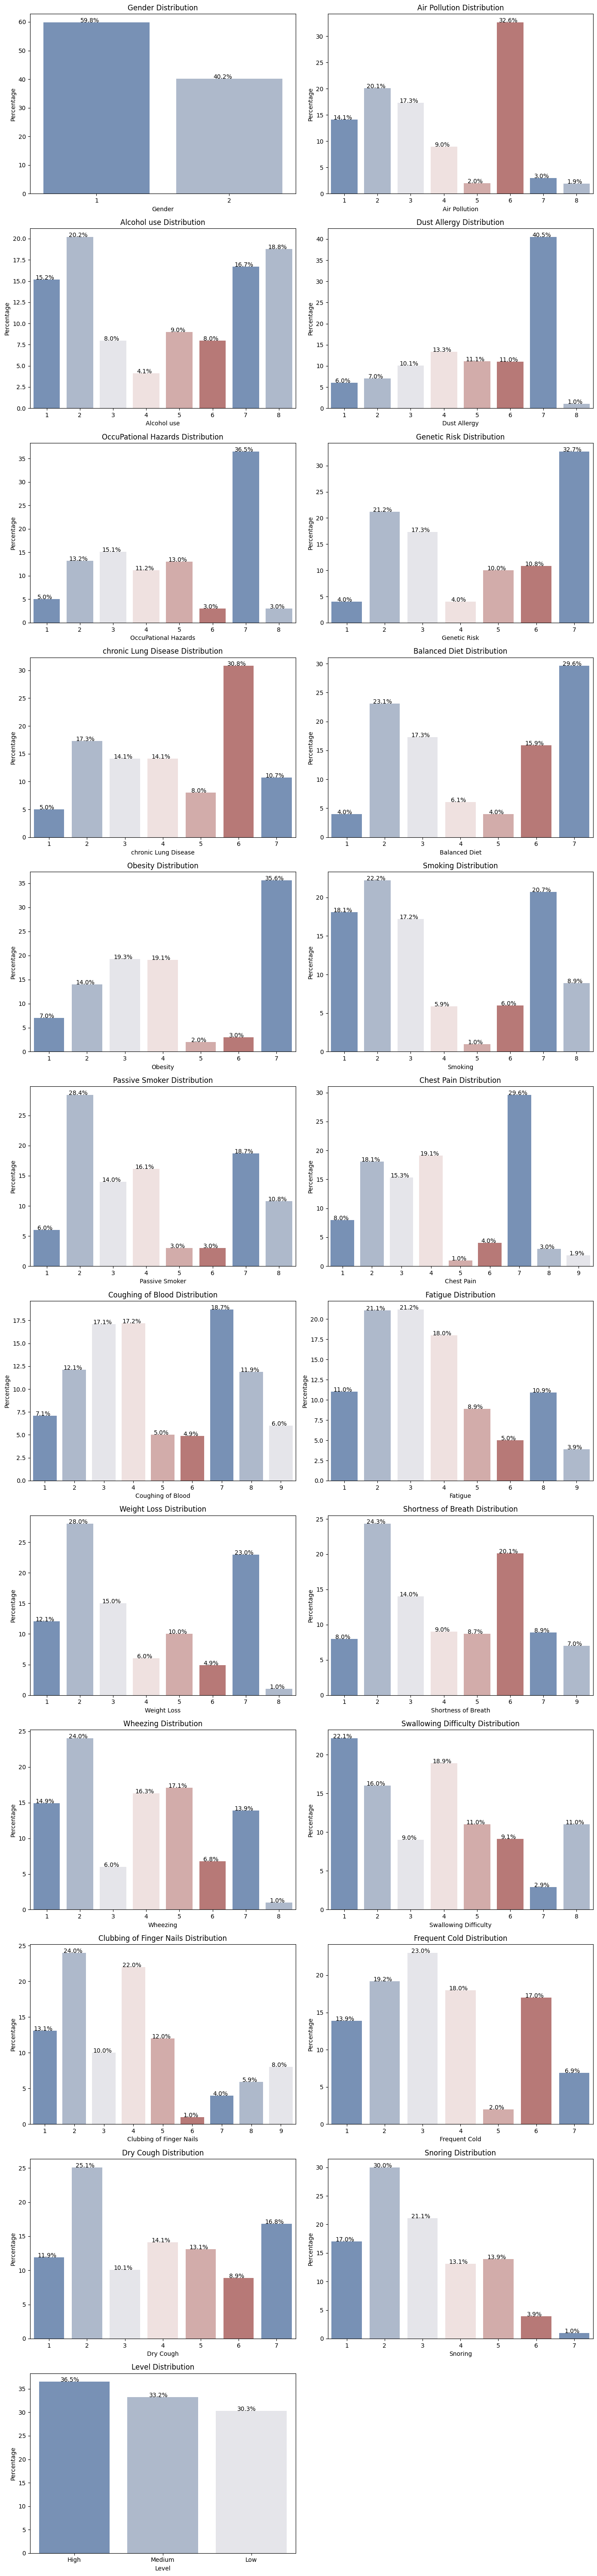

In [17]:
# Univariate Analysis
def plot_percentage_barplots(df, feature_names, n_cols=2, fig_width=14, fig_height=5):
    n_rows = (len(feature_names) + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, n_rows * fig_height))
    axes = axes.flatten()

    for ax, feature in zip(axes, feature_names):
        value_counts = df[feature].value_counts(normalize=True) * 100

        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
        ax.set_title(f'{feature} Distribution')
        ax.set_ylabel('Percentage')
        ax.set_xlabel(feature)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(p.get_height())
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), ha='center')

    for i in range(len(feature_names), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

categorical_features = [col for col in data.columns if data[col].nunique() < 10 and col not in ['index', 'Patient Id', 'Level_numeric']]
plot_percentage_barplots(data, categorical_features)

Distribusi fitur-fitur dengan korelasi tinggi menunjukkan variasi yang signifikan dalam respons pasien terhadap faktor-faktor risiko ini. Sebagian besar fitur memiliki distribusi yang cukup merata atau menunjukkan beberapa puncak, yang mengindikasikan adanya kelompok-kelompok pasien dengan tingkat paparan atau karakteristik yang berbeda.

Distribusi Umur: Terdistribusi cukup luas, dengan puncak sekitar usia 30-an hingga 40-an tahun.<br>
Distribusi Jenis Kelamin: Lebih banyak pasien berjenis kelamin 1 (asumsi laki-laki) dibandingkan dengan jenis kelamin 2 (asumsi perempuan).<br>
Distribusi Level Risiko Kesehatan: Terdistribusi hampir merata antara risiko rendah (Low), sedang (Medium), dan tinggi (High), dengan risiko tinggi sedikit lebih banyak.<br>
Distribusi Polusi Udara: Sebagian besar pasien memiliki skor polusi udara rendah hingga menengah, namun masih ada jumlah signifikan yang mengalami paparan tinggi.<br>
Distribusi Penggunaan Alkohol: Distribusi cukup merata dari rendah hingga tinggi, menunjukkan variasi luas dalam konsumsi alkohol di antara pasien.<br>
Distribusi Kebiasaan Merokok: Mirip dengan alkohol, distribusinya menunjukkan variasi luas dari tidak merokok hingga merokok berat.

**Bivariate**

3. Bagaimana distribusi setiap features terhadap target (Level)

Distribusi Air Pollution terhadap Level

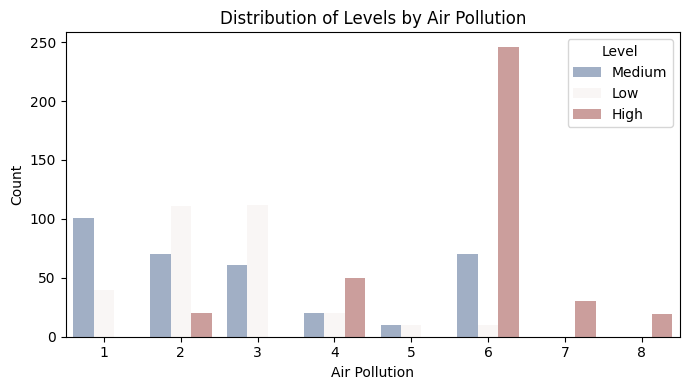

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Air Pollution', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Air Pollution')
plt.xlabel('Air Pollution')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Alcohol Use terhadap Level

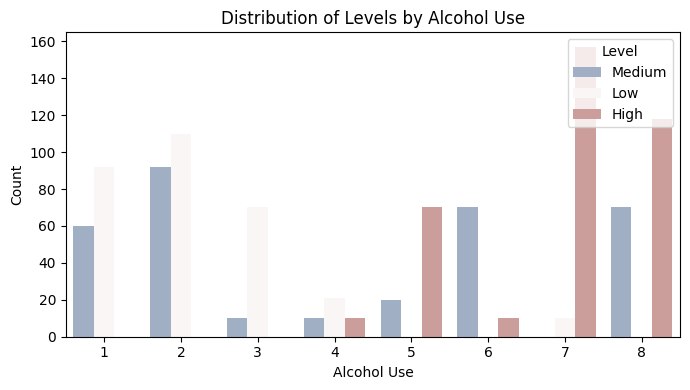

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x='Alcohol use', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Alcohol Use')
plt.xlabel('Alcohol Use')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Dust Allergy terhadap Level

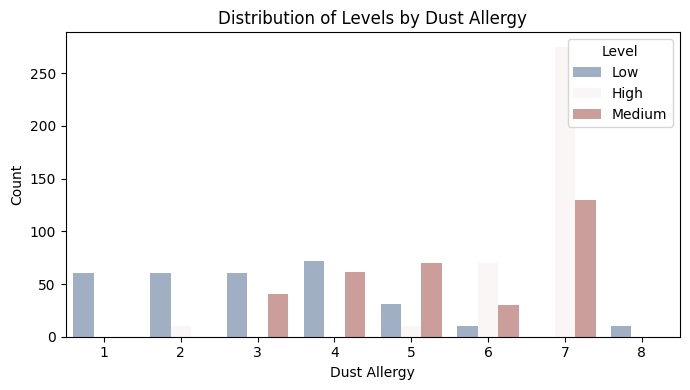

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x='Dust Allergy', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Dust Allergy')
plt.xlabel('Dust Allergy')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Occupational Hazards terhadap Level

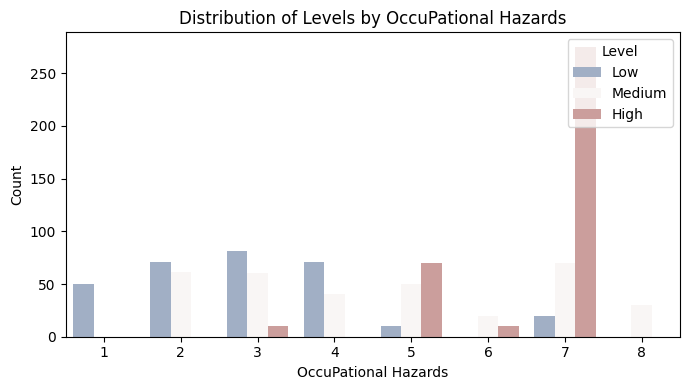

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(x='OccuPational Hazards', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by OccuPational Hazards')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

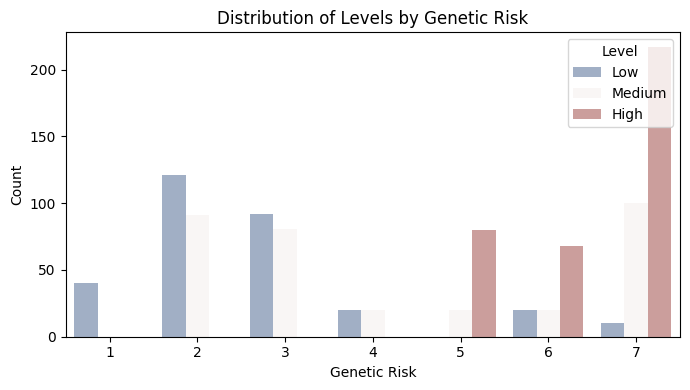

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(x='Genetic Risk', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Genetic Risk')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

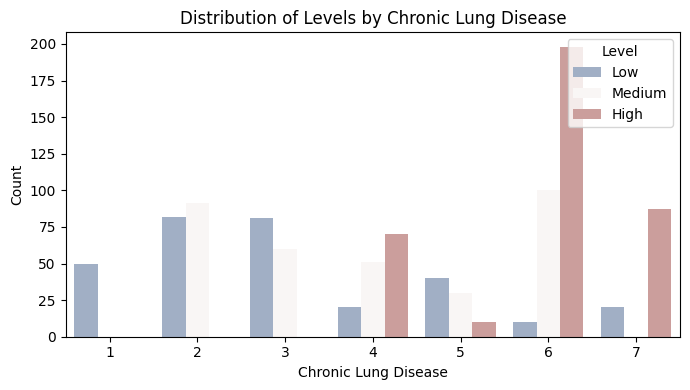

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x='chronic Lung Disease', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

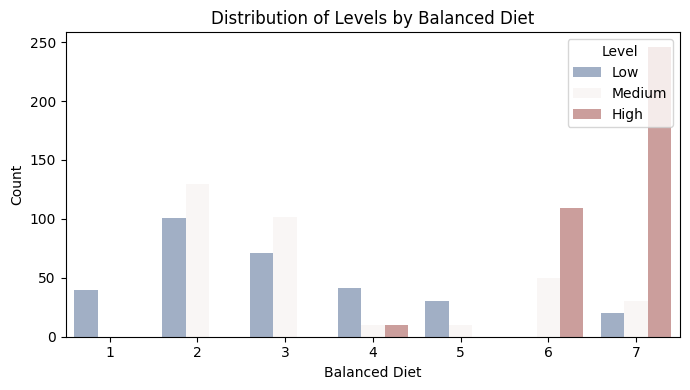

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(x='Balanced Diet', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Balanced Diet')
plt.xlabel('Balanced Diet')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

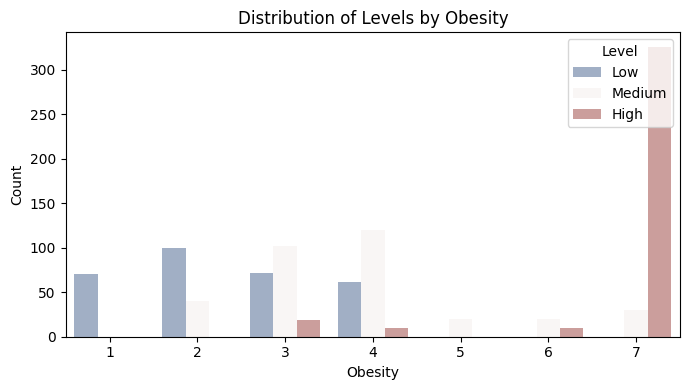

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(x='Obesity', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

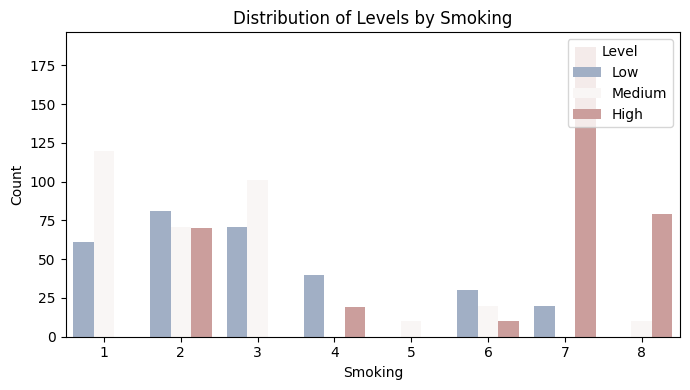

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x='Smoking', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

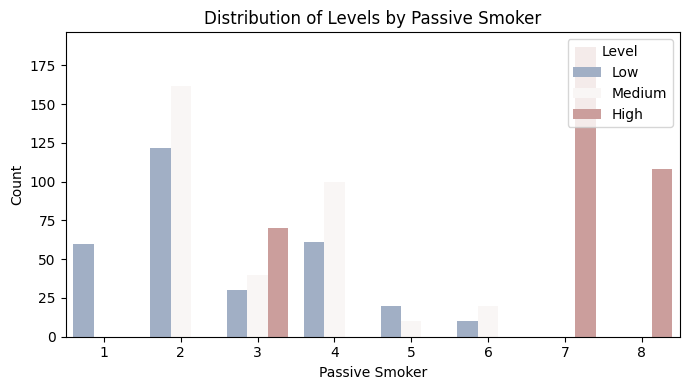

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(x='Passive Smoker', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Passive Smoker')
plt.xlabel('Passive Smoker')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

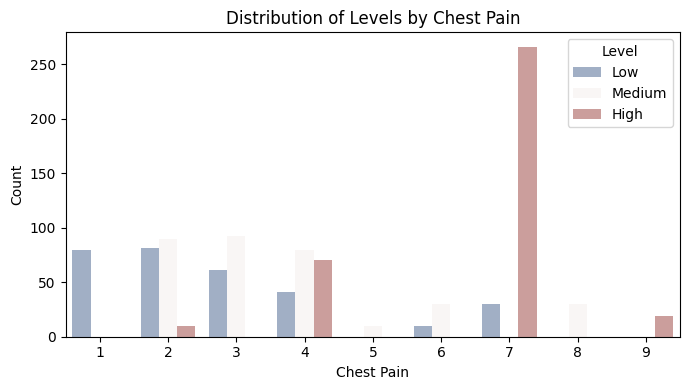

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(x='Chest Pain', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

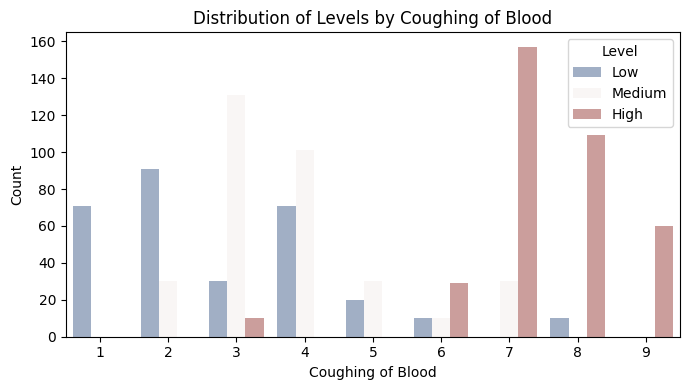

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x='Coughing of Blood', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Coughing of Blood')
plt.xlabel('Coughing of Blood')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

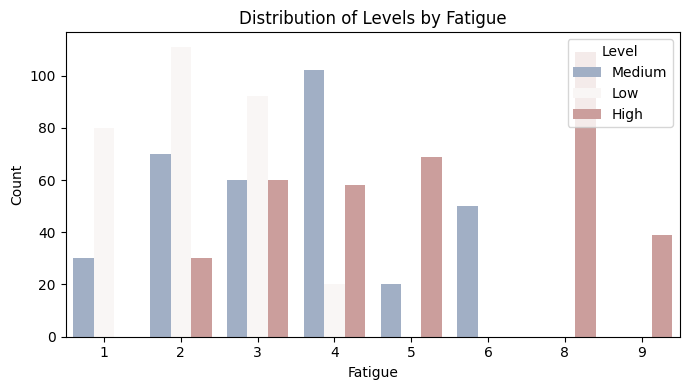

In [30]:
plt.figure(figsize=(7,4))
sns.countplot(x='Fatigue', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Fatigue')
plt.xlabel('Fatigue')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

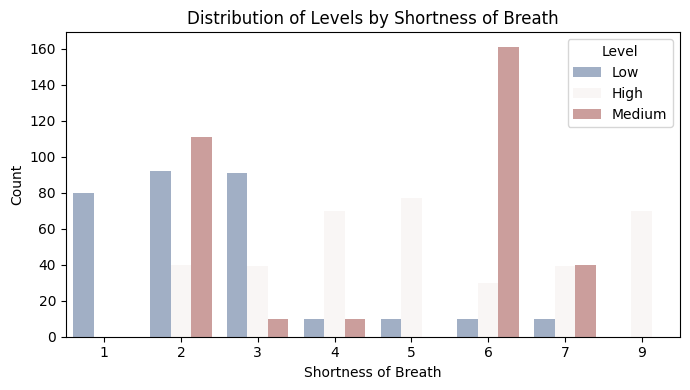

In [31]:
plt.figure(figsize=(7,4))
sns.countplot(x='Shortness of Breath', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Shortness of Breath')
plt.xlabel('Shortness of Breath')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

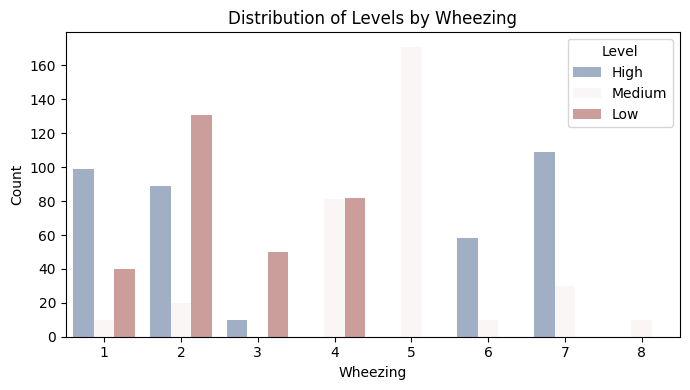

In [32]:
plt.figure(figsize=(7,4))
sns.countplot(x='Wheezing', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Wheezing')
plt.xlabel('Wheezing')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

## Machine Learning Implementation (Modelling)

In [33]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


%config InlineBackend.figure_format = 'retina'

In [34]:
# Convert data categorical ke numerical
data['Level'] = data['Level'].replace({'Low':0,'Medium':1,'High':2})

In [35]:
# Splitting data
X = data.drop(columns=['Level'])
y = data.Level

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [37]:
# Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
# Encode the target vector
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

### **Feature Importance**

Using Random Forest

In [39]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

feature_importance_rf = rf_clf.feature_importances_

features_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf}).sort_values(by='Importance', ascending=False)

<ipython-input-40-7d4a69b6f51a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_rf_df.head(10), x='Importance', y='Feature', palette='viridis')


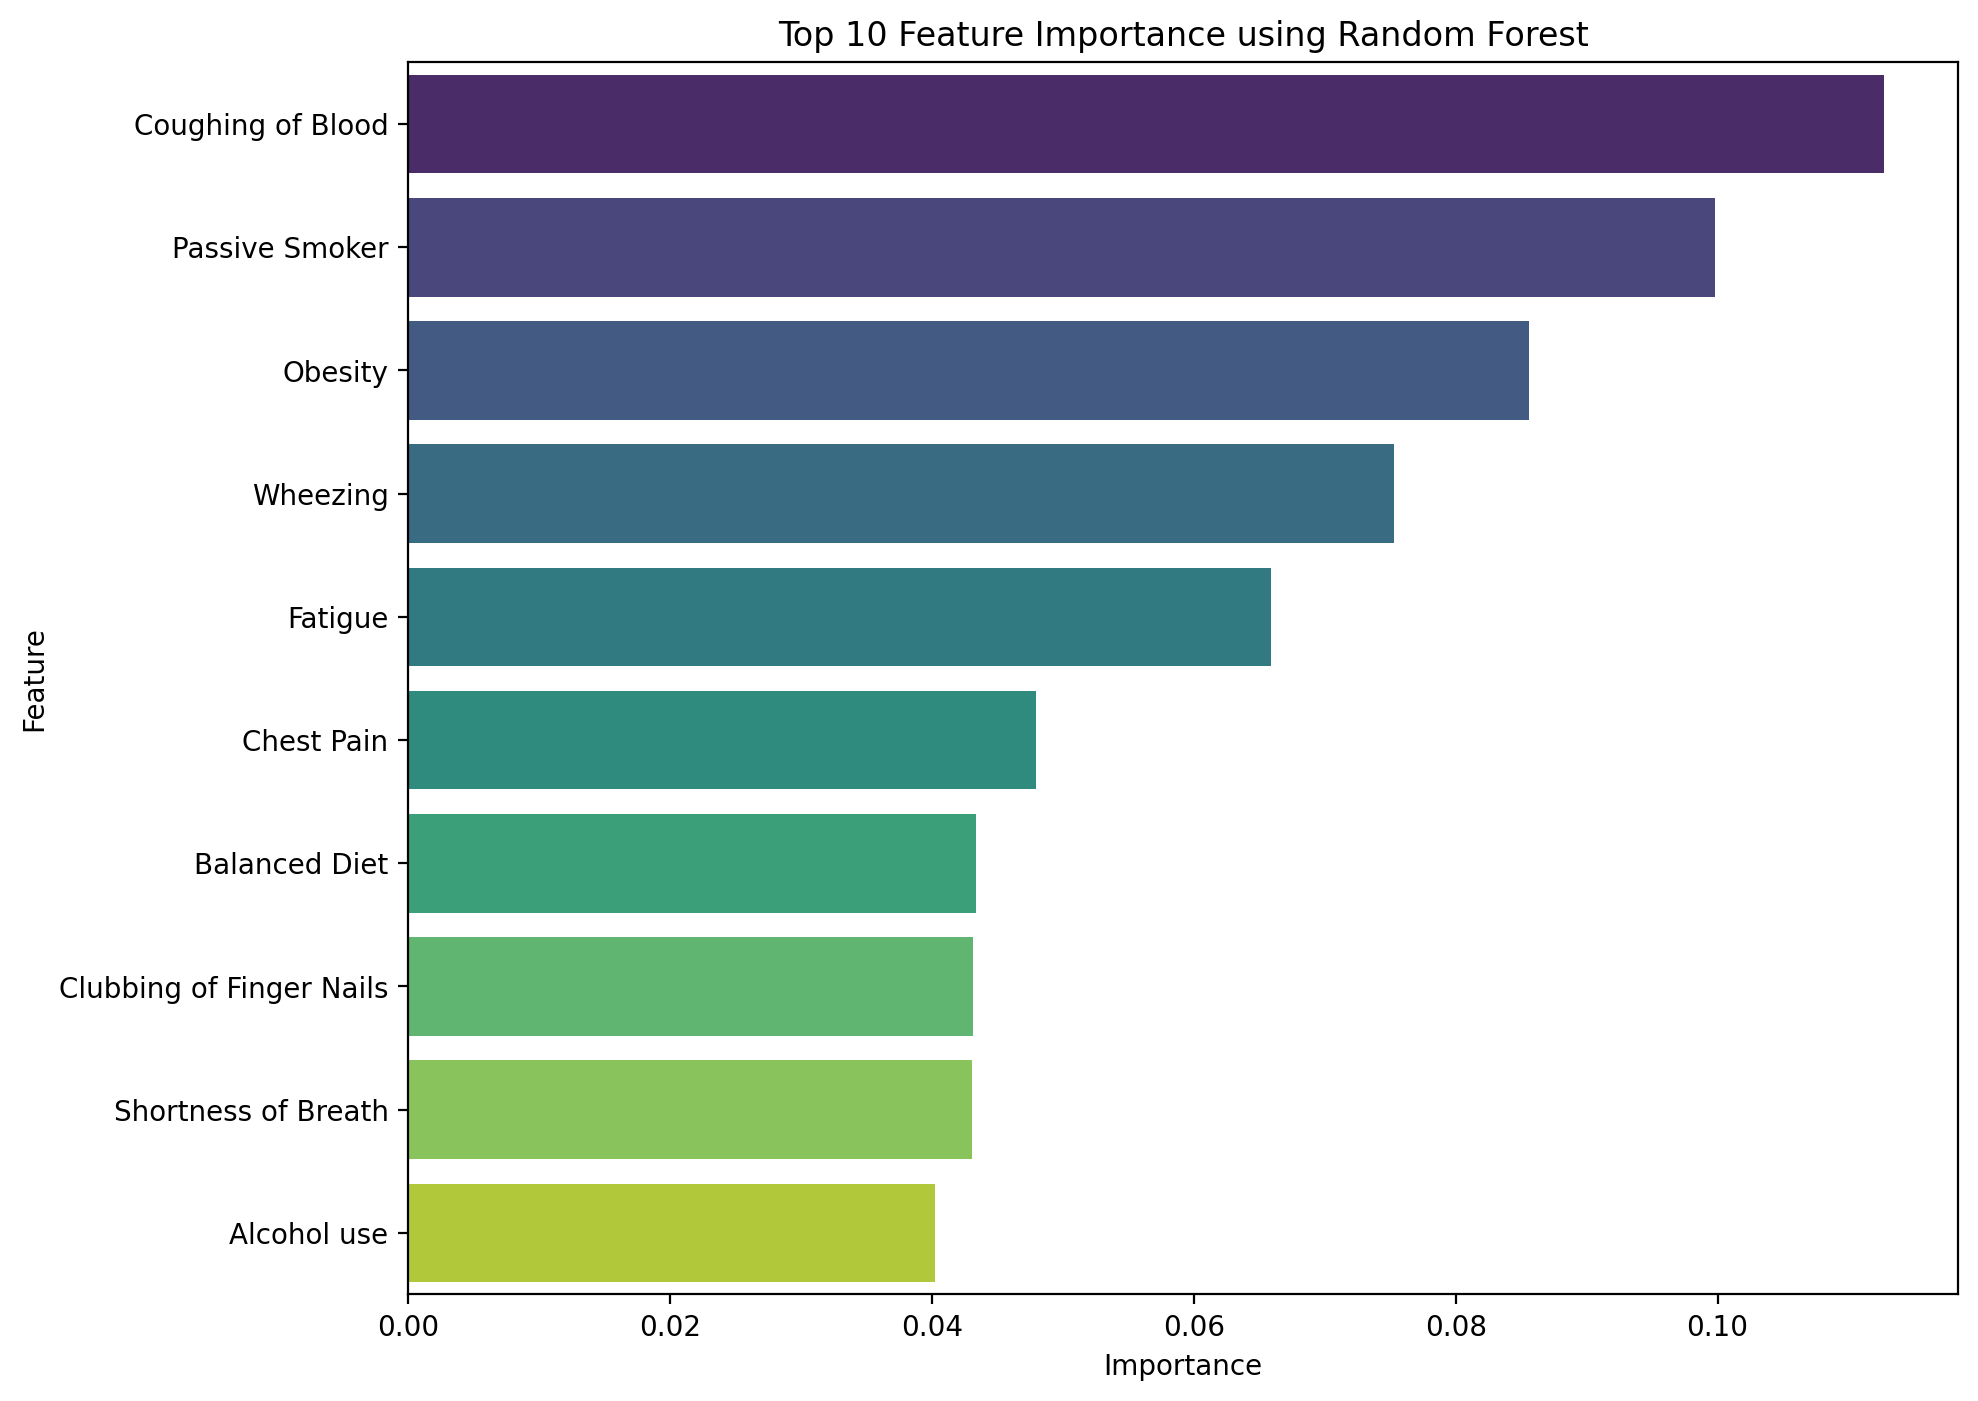

In [40]:
plt.figure(figsize=(10, 8))
sns.barplot(data=features_rf_df.head(10), x='Importance', y='Feature', palette='viridis')

plt.title('Top 10 Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Using Decision Tree

In [41]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_dt, y_train_dt)

feature_importance_dt = dt_clf.feature_importances_

features_dt_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_dt}).sort_values(by='Importance', ascending=False)

<ipython-input-42-0af8143ae7ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_dt_df.head(10), x='Importance', y='Feature', palette='magma')


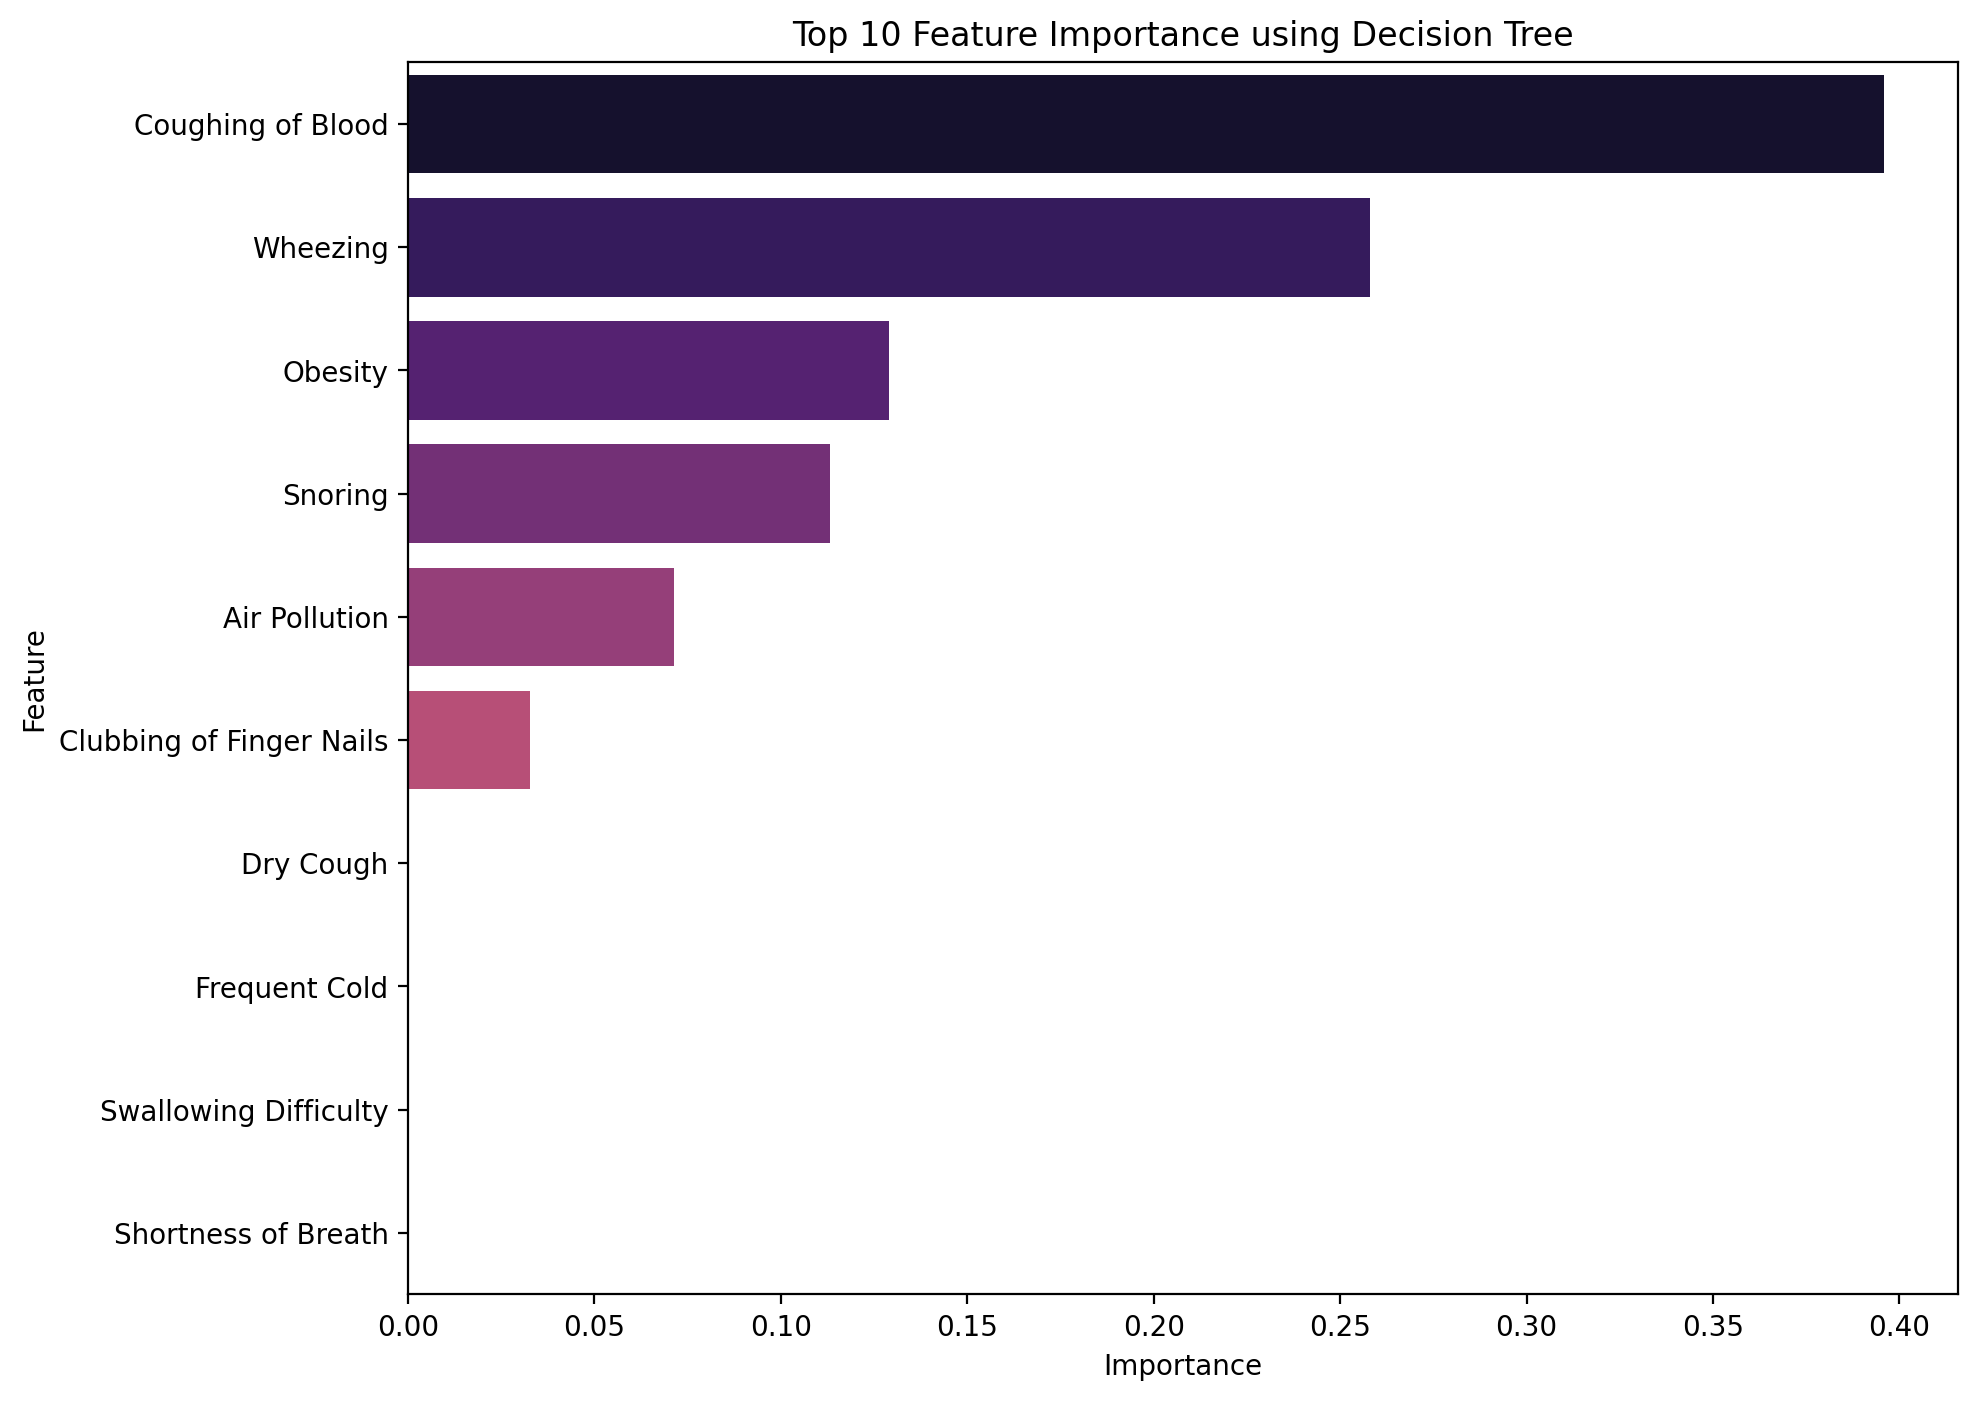

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(data=features_dt_df.head(10), x='Importance', y='Feature', palette='magma')

plt.title('Top 10 Feature Importance using Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Using Gradient Boosting

In [43]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_gb, y_train_gb)

feature_importance_gb = gb_clf.feature_importances_

features_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb}).sort_values(by='Importance', ascending=False)

<ipython-input-44-45f199efc708>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_gb_df.head(10), x='Importance', y='Feature', palette='coolwarm')


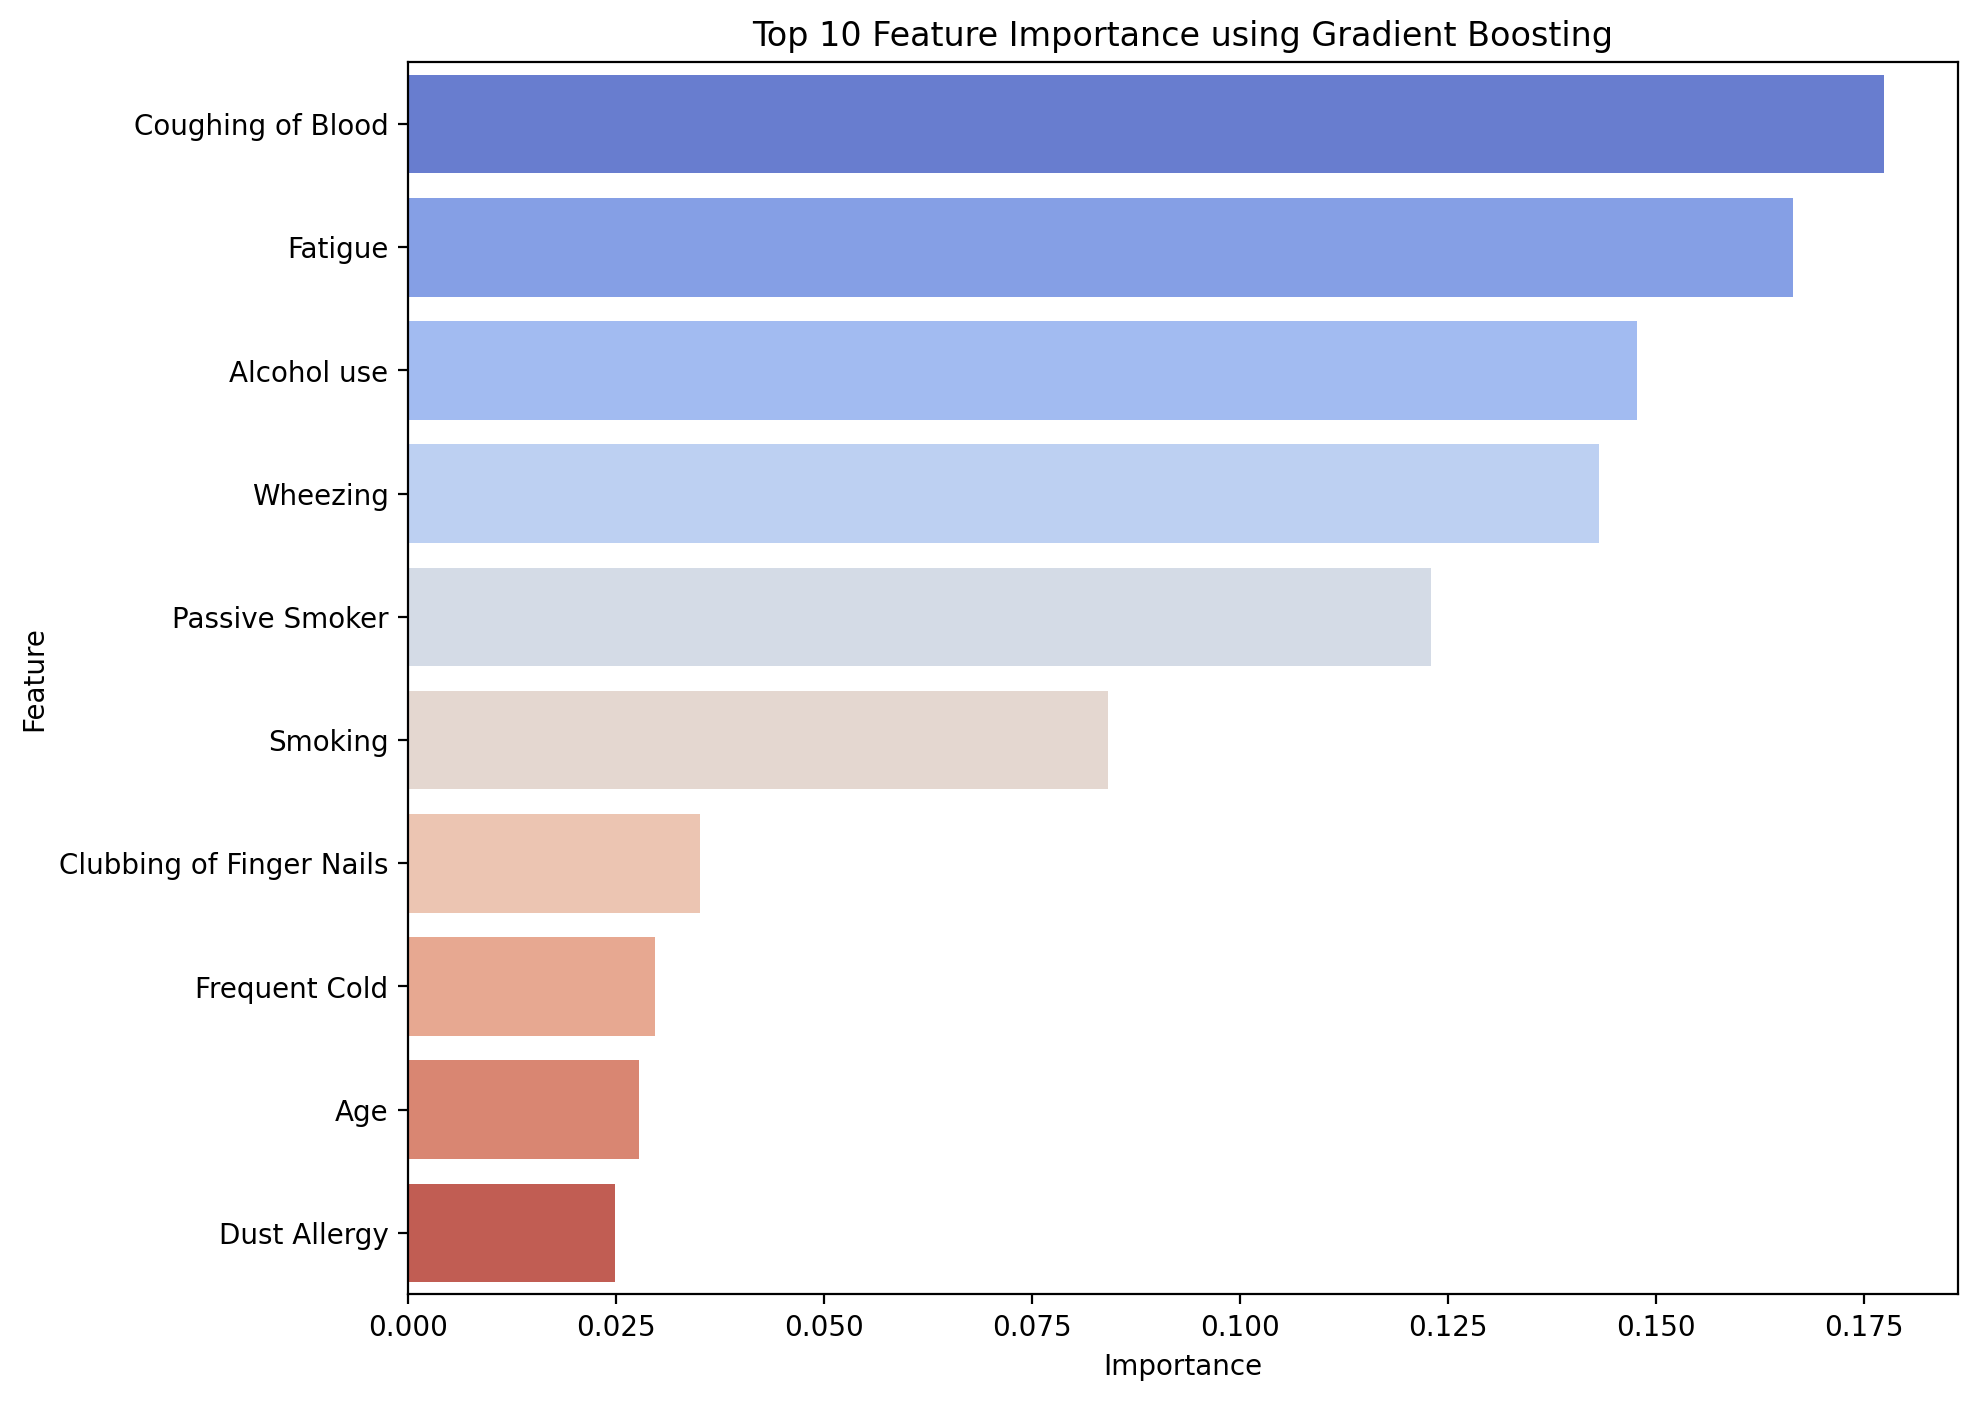

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(data=features_gb_df.head(10), x='Importance', y='Feature', palette='coolwarm')

plt.title('Top 10 Feature Importance using Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Feature Selection**

In [45]:
X = X[['Coughing of Blood', 'Wheezing', 'Obesity', 'Passive Smoker', 'Alcohol use', 'Smoking']]

### **1. Decision Tree**

Without Hyperparameter Tuning

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [47]:
def get_score(model, X, y):
    n = cross_val_score(model,X,y,scoring ='accuracy',cv=10)
    return n

In [48]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
dtc_score = get_score(dtc, X, y).mean()
print(dtc_score)

1.0


With Hyperparameter Tuning

In [50]:
params_dt = {
    'max_depth': [None, 5, 10, 15],  # More conservative depth options
    'min_samples_split': [10, 20, 30],  # Higher values to prevent very specific splits
    'min_samples_leaf': [5, 10, 15]  # Higher values to ensure each leaf has more samples
}

dtc = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object with the new grid
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dt, cv=10, scoring='accuracy')

# Fit the grid search to the data again
dt_grid_search.fit(X_train, y_train)

# Best parameters and best score from the more restrictive grid
best_params_restricted = dt_grid_search.best_params_
best_score_restricted = dt_grid_search.best_score_

best_params_restricted, best_score_restricted

({'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10},
 0.9962500000000001)

In [51]:
dtct = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
)
dtct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [52]:
dtct_score = get_score(dtct, X, y).mean()
print(dtct_score)

0.905


Under Sampling

In [53]:
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [54]:
X_rus_e, y_rus_e = rus.fit_resample(X, y_encoded)

In [55]:
dt_under = get_score(dtct, X_rus, y_rus).mean()
print(dt_under)

0.8975946275946276


Over Sampling

In [56]:
sm = SMOTE()

X_over, y_over = sm.fit_resample(X, y)
over_resampled = pd.merge(X_over, y_over, left_index = True, right_index = True)

over_resampled.drop_duplicates(inplace=True)

X_sm = over_resampled.drop(columns=['Level'], axis=1)
y_sm = over_resampled['Level']

In [57]:
X_sm_e, y_sm_e = sm.fit_resample(X, y_encoded)

In [58]:
dt_over = get_score(dtct, X_sm, y_sm).mean()
print(dt_over)

0.8150000000000001


### **2. Random Forest**

Without Hyperparameter Tuning

In [59]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
rfc_score = get_score(rfc, X, y).mean()
print(rfc_score)

1.0


With Hyperparameter Tuning

In [61]:
params_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate the GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=10, scoring='accuracy')

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score from the grid search
best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

best_params_rf, best_score_rf

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 1.0)

In [62]:
rfct = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
)
rfct.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

In [63]:
rfct_score = get_score(rfct, X, y).mean()
print(rfct_score)

1.0


Under Sampling

In [64]:
rf_under = get_score(rfct, X_rus, y_rus).mean()
print(rf_under)

1.0


Over Sampling

In [65]:
rf_over = get_score(rfct, X_sm, y_sm).mean()
print(rf_over)

0.875


### **3. XGBoost**

Without Hyperparameter Tuning

In [66]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
xgbc_score = get_score(xgbc, X, y_encoded).mean()
print(xgbc_score)

1.0


With Parameter Tuning

In [68]:
xgbct = XGBClassifier(
    max_depth=3,              # Mengurangi kedalaman pohon (defaultnya 6)
    min_child_weight=3,       # Meningkatkan jumlah minimum pengamatan (default 1)
    subsample=0.8,            # Menggunakan 80% dari sampel (defaultnya ini 1)
    eta=0.5
)
xgbct.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
xgbct_score = get_score(xgbct, X, y_encoded).mean()
print(xgbct_score)

1.0


Under Sampling

In [70]:
xgb_under = get_score(xgbct, X_rus, y_rus_e).mean()
print(xgb_under)

1.0


Over Sampling

In [71]:
xg_over = get_score(xgbct, X_sm_e, y_sm_e).mean()
print(xg_over)

1.0


### **4. Logistic Regression**

Without Hyperparameter Tuning

In [72]:
lrc = LogisticRegression(solver='liblinear') #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
lrc.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [73]:
lrc_score = get_score(lrc, X, y).mean()
print(lrc_score)

0.907


With Hyperparameter Tuning

In [74]:
params_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 0.5, 1]
}

lrc = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object with the new grid
lr_grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), params_lr, cv=10, scoring='accuracy')

# Fit the grid search to the data again
lr_grid_search.fit(X_train, y_train)

# Best parameters and best score from the more restrictive grid
best_params = lr_grid_search.best_params_
best_score = lr_grid_search.best_score_

best_params, best_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only

({'C': 1, 'penalty': 'l1'}, 0.9225000000000001)

In [75]:
lrct = LogisticRegression(
    solver='liblinear',
    C=1,
    penalty='l1'

)
lrct.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [76]:
lrct_score = get_score(lrct, X, y).mean()
print(lrct_score)

0.9399999999999998


Under Sampling

In [77]:
lr_under = get_score(lrct, X_rus, y_rus).mean()
print(lr_under)

0.9361904761904762


Over Sampling

In [78]:
lr_over = get_score(lrct, X_sm, y_sm).mean()
print(lr_over)

0.775


### **5. Support Vector Machine (SVM)**

Without Hyperparameter Tuning

In [79]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [80]:
svc_score = get_score(svc, X, y).mean()
print(svc_score)

0.99


With Hyperparameter Tuning

In [81]:
svct = SVC(kernel='rbf', C=0.5, gamma='scale')
svct.fit(X_train, y_train)

SVC(C=0.5)

In [82]:
svct_score = get_score(svct, X, y).mean()
print(svct_score)

0.99


Under Sampling

In [83]:
sv_under = get_score(svct, X_rus, y_rus).mean()
print(sv_under)

0.9889987789987791


Over Sampling

In [84]:
sv_over = get_score(svct, X_sm, y_sm).mean()
print(sv_over)

0.8100000000000002


### **Confusion Matrix**

In [85]:
#Cross Validation Score
print("Without Hyperparameter Tuning Score:")
print("Decision Tree \t\t\t:", dtc_score)
print("Random Forest \t\t\t:", rfc_score)
print("Logistic Regression \t\t:", lrc_score)
print("XGBoost \t\t\t:", xgbc_score)
print("Support Vector Classification \t:", svc_score)

print("\nWith Hyperparameter Tuning Score:")
print("Decision Tree \t\t\t:", dtct_score)
print("Random Forest \t\t\t:", rfct_score)
print("Logistic Regression \t\t:", lrct_score)
print("XGBoost \t\t\t:", xgbct_score)
print("Support Vector Classification \t:", svct_score)

print("\nUndersampling Score:")
print("Decision Tree \t\t\t:", dt_under)
print("Random Forest \t\t\t:", rf_under)
print("Logistic Regression \t\t:", lr_under)
print("XGBoost \t\t\t:", xgb_under)
print("Support Vector Classification \t:", sv_under)

print("\nOversampling Score:")
print("Decision Tree \t\t\t:", dt_over)
print("Random Forest \t\t\t:", rf_over)
print("Logistic Regression \t\t:", lr_over)
print("XGBoost \t\t\t:", xg_over)
print("Support Vector Classification \t:", sv_over)

Without Hyperparameter Tuning Score:
Decision Tree 			: 1.0
Random Forest 			: 1.0
Logistic Regression 		: 0.907
XGBoost 			: 1.0
Support Vector Classification 	: 0.99

With Hyperparameter Tuning Score:
Decision Tree 			: 0.905
Random Forest 			: 1.0
Logistic Regression 		: 0.9399999999999998
XGBoost 			: 1.0
Support Vector Classification 	: 0.99

Undersampling Score:
Decision Tree 			: 0.8975946275946276
Random Forest 			: 1.0
Logistic Regression 		: 0.9361904761904762
XGBoost 			: 1.0
Support Vector Classification 	: 0.9889987789987791

Oversampling Score:
Decision Tree 			: 0.8150000000000001
Random Forest 			: 0.875
Logistic Regression 		: 0.775
XGBoost 			: 1.0
Support Vector Classification 	: 0.8100000000000002


In [86]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [87]:
y_test_hat_dt = dtct.predict(X_test)
y_test_hat_rf = rfct.predict(X_test)
y_test_hat_lr = lrct.predict(X_test)
y_test_hat_sv = svct.predict(X_test)
y_test_hat_xg = xgbct.predict(X_test)

In [88]:
def perform(y_test_hat):
    print("Precision: ", precision_score(y_test, y_test_hat, average = 'macro'))
    print("Recall   : ", recall_score(y_test, y_test_hat, average = 'macro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_hat))
    print("F1 Score : ", f1_score(y_test, y_test_hat, average = 'macro'))
    cm = confusion_matrix(y_test, y_test_hat)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_hat))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision:  0.9160702546019603
Recall   :  0.9059878694025035
Accuracy :  0.91
F1 Score :  0.9027006017718091

 [[55  0  0]
 [ 9 46  8]
 [ 0  1 81]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        55
           1       0.98      0.73      0.84        63
           2       0.91      0.99      0.95        82

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.90       200
weighted avg       0.92      0.91      0.91       200

******************************************************



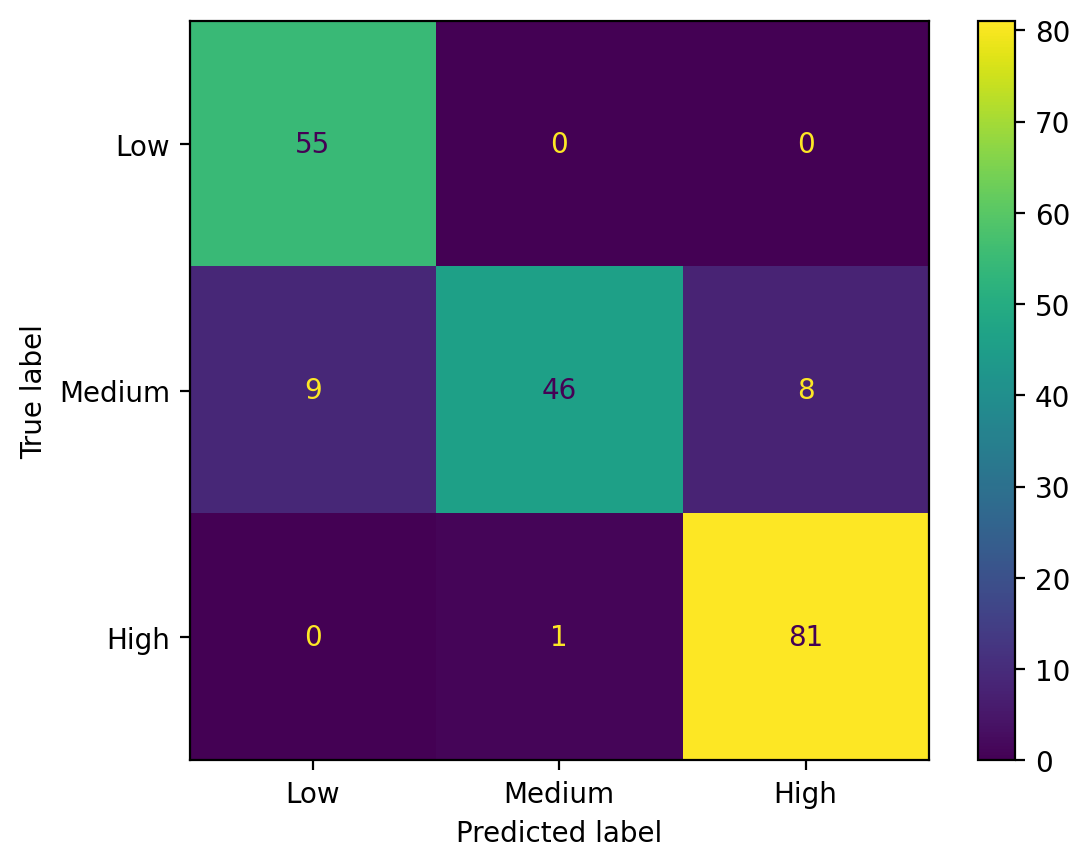

In [89]:
#Decision Tree Performance
perform(y_test_hat_dt)

Precision:  1.0
Recall   :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



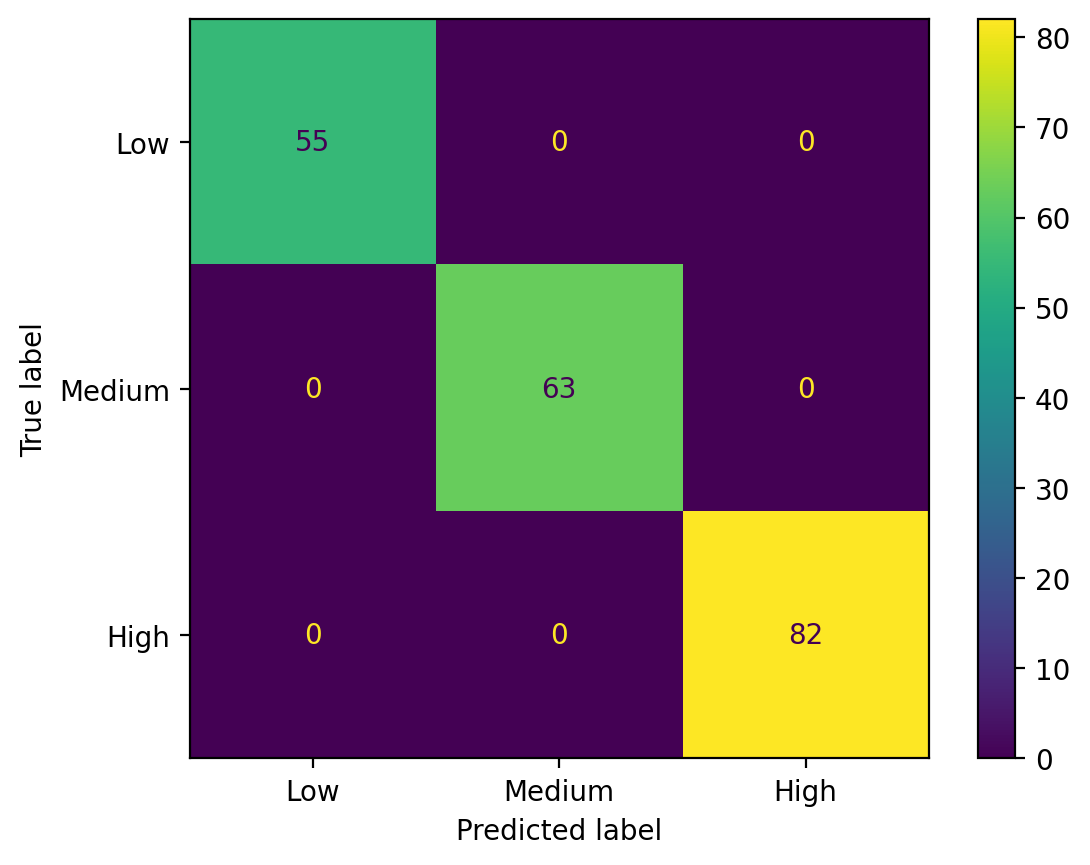

In [90]:
#Random Forest Performance
perform(y_test_hat_rf)

Precision:  0.9774826059456041
Recall   :  0.972005772005772
Accuracy :  0.975
F1 Score :  0.9745058032083979

 [[53  2  0]
 [ 0 60  3]
 [ 0  0 82]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.97      0.95      0.96        63
           2       0.96      1.00      0.98        82

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

******************************************************



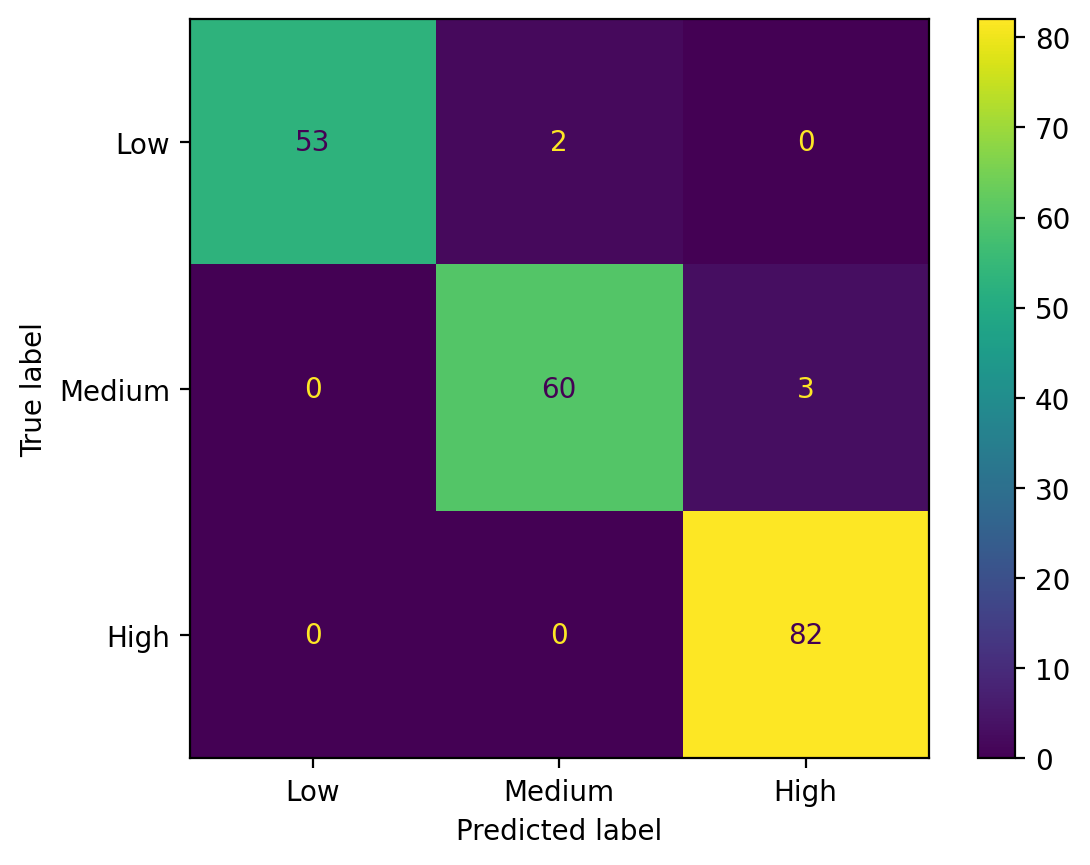

In [91]:
#Logistic Regression Performance
perform(y_test_hat_lr)

Precision:  1.0
Recall   :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



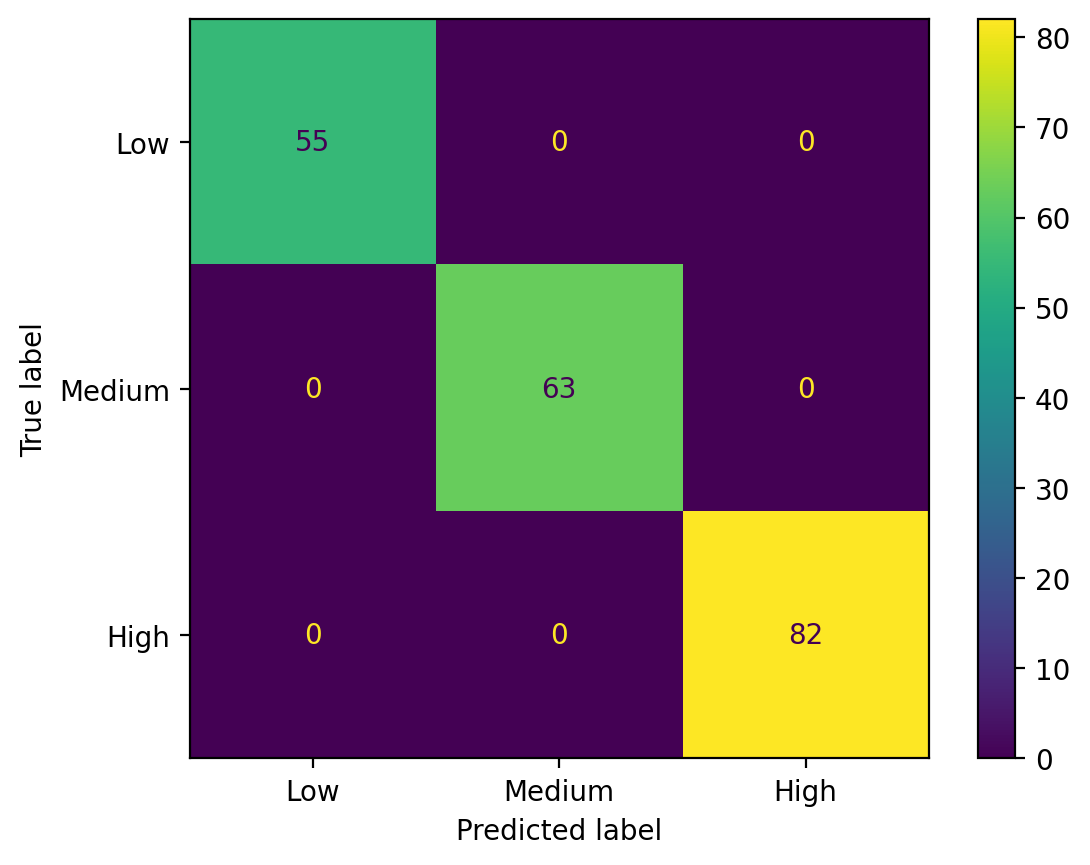

In [92]:
#XGBoost Perofrmance
perform(y_test_hat_xg)

Precision:  1.0
Recall   :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



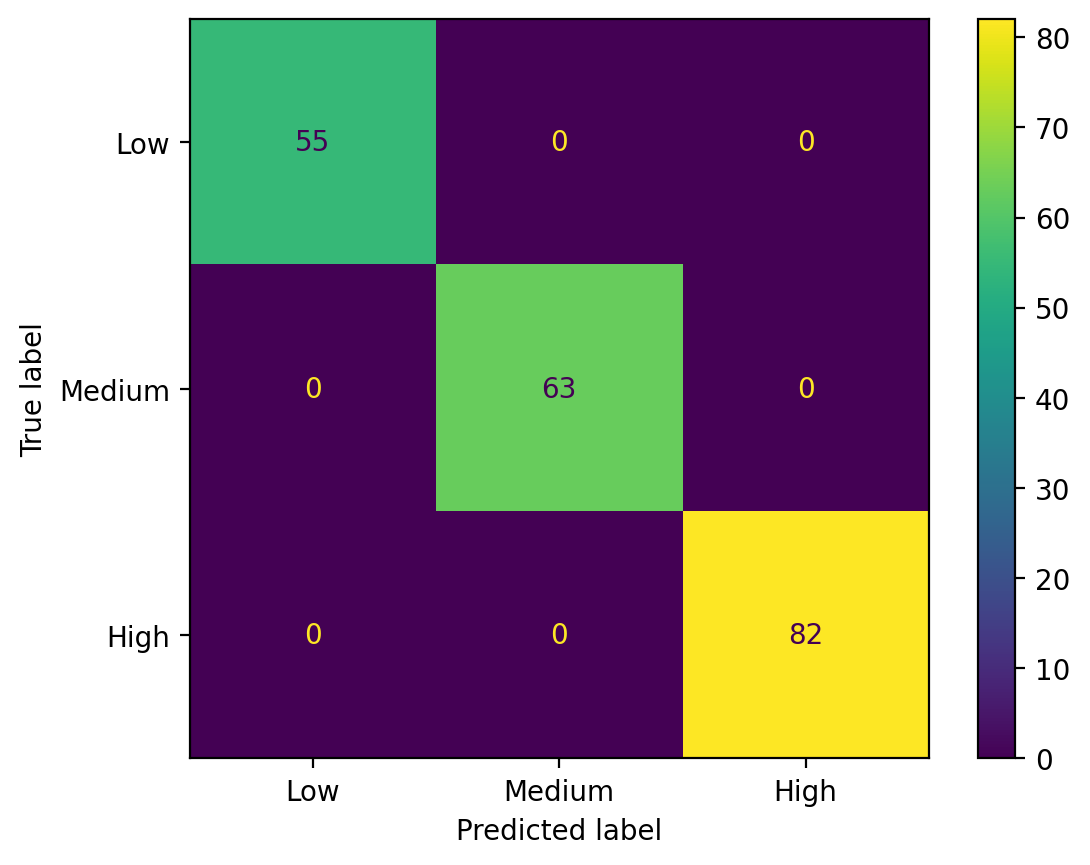

In [93]:
#Support Vector Performance
perform(y_test_hat_sv)

In [94]:
import pickle

def save_pickle(filename, model):
    filename = filename+'.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

In [95]:
save_pickle('dt_model', dtct)
save_pickle('rf_model', rfct)
save_pickle('logreg_model', lrct)
save_pickle('svc_model', svct)

### **Conclusion**

Berdasarkan hasil dari serangkaian modelling yang telah dilakukan, model yang memberikan hasil terbaik adalah Random Forest.

Fitur terpenting yang kami ambil menurut Random Forest, Decision Tree, dan Gradient Boosting adalah Coughing of Blood, Wheezing, Obesity, Passive Smoker, Alcohol Use, dan Smoking